# Exploratory Data Analysis in Python


## I. Getting to Know the Dataset

06/29/2025

The datasets found in this notes are can be seen inside the dataset folder:


In [20]:
import os 

os.listdir('datasets')

['clean_books.csv']

### Contents:
- Initial Exploration
  - Initial Exploration
  - Exploring Categorical Data
  - Exploring Numerical Data
- Data Validation
  - Validating Data Types
  - Validating Categorical Data
  - Validating Numerical Data
- Data Summarization
  - The Powerful `.agg()`
  - `.agg()` and `.groupby()`

The process of cleaning and reviewing data to 
- derive insights
- generate hypotheses for experiments

### Initial Exploration
There are tools you can use to get an overview about your dataset, this overview will tell a lot some include:
- `.head()`
- `.info()`
- `.describe()`

**When exploring categorical data:**
- We usually want to count how many are the different categories and we can do that with `df.value_counts('category')`

In [21]:
import pandas as pd
books_df = pd.read_csv('datasets/clean_books.csv')
books_df.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [22]:
books_df.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

**When exploring numerical data:**
- When we deal with numerical data we often use **histogram** to see where the most numerical data lie
- You use `.histplot()` and to change the width of the bin use `binwidth =  ...`

```python
sns.histplot(data=df, x = 'column')
plt.show()
```

In our case with the `books_df` we can use histogram to explore how our rating column looks:

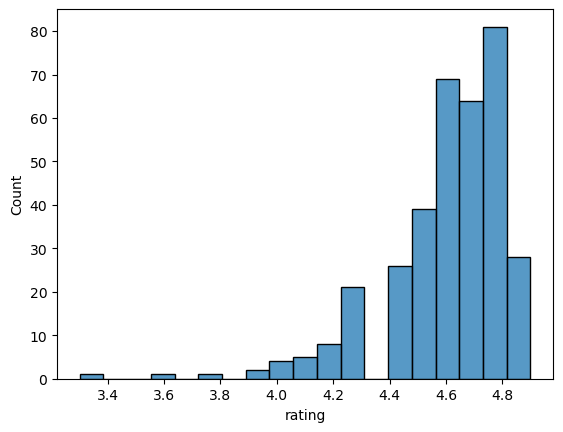

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = books_df, x = 'rating')
plt.show()

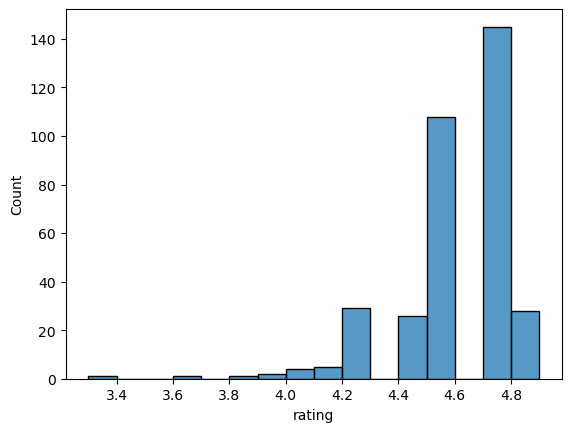

In [24]:
sns.histplot(data = books_df, x = 'rating', binwidth = .1)
plt.show()

You can infer here then that the next time you look for a rating, it would probably be **4.5 - 4.6** or **4.7 - 4.8**

## Data Validation
- We want to make sure that we have the correct data types and ranges before we start the analysis

**Validating Data Types:**
- You can use `.info()` or `.dtypes()` to see the data types
- You can use the `series.astype(data_type)` or `df.astype(data_type)`

```python
# if the year column is in floats:

books_df['year'].astype(int)
```

**Validating Categorical Data:**
- Validate categorical data by comparing data in a column to an expected or unexpected values
- You can use the `.isin([])`

For example:
```python
# You expect that there would be `Fiction` and `Non Fiction` so you do:
df['category'].isin(['expectation 1', 'expectation 2', '...'])
```

if a series that comes out is all false, there maybe mistakes in your category column.


You can invert this by having `~` before:

example:
```python
~df['category'].isin(['expectation 1', 'expectation 2', '...'])
```

if a series that comes out is all true and you expect that those expectations *must* be there then there is something wrong with your category column.

**Validating Numerical Data:**

- To get all the numerical data we can use: `df.select_dtypes('number')`
- When we validate numerical data, we often want to know if the columns fit the expected range and that is done with `series.min()` or `.max()`
- We often use boxplot to visualize ranges:

```python
sns.boxplot(data = df, x = numerical_column) # or if by category y = 'category'
plt.show()
```

### Data Summarization
- This means aggregating things either by grouping them and then using aggregates functions on them. In that way we can summarize things about them.
- This is usually done with `df.groupby('category')`

**Example:**<br>
`books_df.groupby('genre').mean()`

You can use the following:
- .sum()
- .count()
- .min()
- .max()
- .var()
- .std()

**The Powerful `.agg()`**

- We use this typically if we want to apply multiple functions to aggregated things

Example:
```python
df.agg(['mean', 'std'])
```

In [30]:
books_df.select_dtypes('number').agg(['mean', 'std'])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


**You can also use dictionary to specify which aggregating functions you can use to which column:**

Example:

```python
df.select_dtypes('number').agg({'numeric_1': ['mean', 'std'], 'numeric_2': ['mean', 'sum']})
```

**`.agg()` and `.groupby()`:**

In [33]:
books_df.groupby('genre').agg(mean_rating = ('rating', 'mean'),\
                                                     std_rating = ('rating', 'std'),\
                                                     median_year = ('year', 'median'))

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0
